<a href="https://colab.research.google.com/github/rajeshbabu1990/Data_science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression - Titanic Survival



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Load the Data

In [6]:
data=pd.read_csv('/content/drive/MyDrive/TitanicPreprocessed - TitanicPreprocessed.csv')

#Exploratory Data Analysis

In [ ]:
null_check=data.isnull().sum()
null_check

In [8]:
# Identifying True Binary Data and Non Binary Data
data_bin_true = data.columns[data.apply(lambda col: set(col.unique()).issubset({0, 1}))].tolist()
data_bin_false = data.columns[~data.apply(lambda col: set(col.unique()).issubset({0, 1}))].tolist()

# Create labels and values
labels = data_bin_true + data_bin_false
values = ['Binary'] * len(data_bin_true) + ['Non-Binary'] * len(data_bin_false)
data_final=data[labels]
# Calculate overall survival rate
survival_rate = data["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 38.38%


<ipython-input-9-4d5b9afde388>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette="coolwarm")


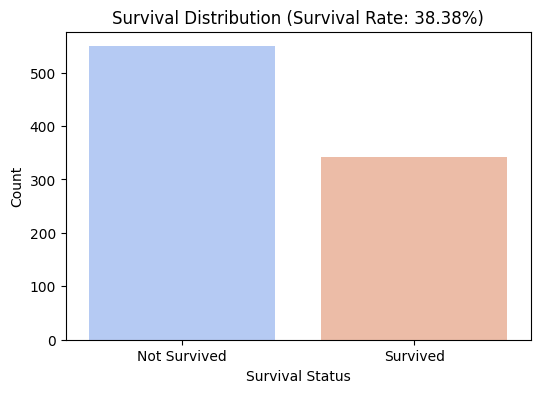

In [9]:
# Plot survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=data, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Not Survived", "Survived"])
plt.title(f"Survival Distribution (Survival Rate: {survival_rate:.2f}%)")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()

<ipython-input-10-753408255d34>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="coolwarm")
<ipython-input-10-753408255d34>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="coolwarm")


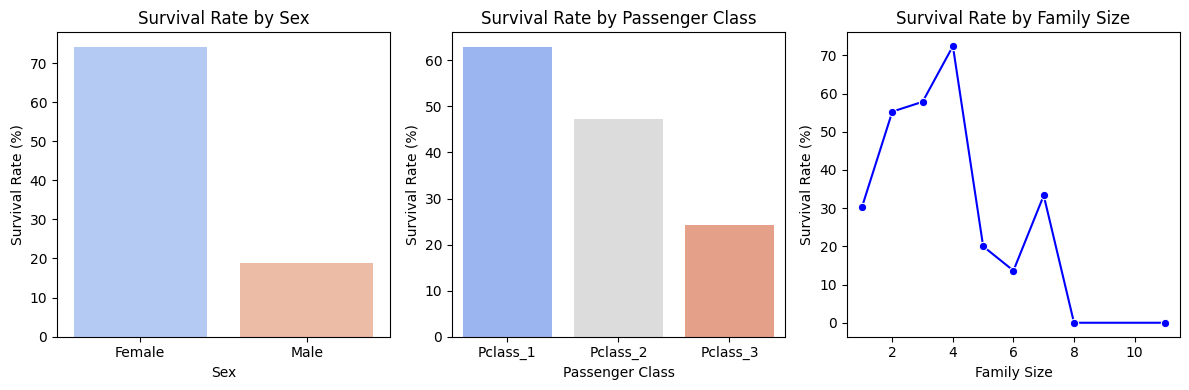

Survival Rate by Sex:
Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
Pclass_1    62.962963
Pclass_2    47.282609
Pclass_3    24.236253
Name: Survived, dtype: float64

Survival Rate by Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


In [10]:
# Survival rate by sex
survival_by_sex = data.groupby("Sex")["Survived"].mean() * 100

# Survival rate by passenger class
pclass_columns = ["Pclass_1", "Pclass_2", "Pclass_3"]
df_pclass = data.melt(id_vars=["Survived"], value_vars=pclass_columns, var_name="Pclass", value_name="Is_Pclass")
df_pclass = df_pclass[df_pclass["Is_Pclass"] == 1]  # Keep only rows where class is 1
survival_by_pclass = df_pclass.groupby("Pclass")["Survived"].mean() * 100

# Survival rate by family size
survival_by_family_size = data.groupby("FamilySize")["Survived"].mean() * 100

# Plot survival by sex, class, and family size
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate (%)")

plt.subplot(1, 3, 2)
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")

plt.subplot(1, 3, 3)
sns.lineplot(x=survival_by_family_size.index, y=survival_by_family_size.values, marker="o", color="blue")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")

plt.tight_layout()
plt.show()

# Print survival rates
print("Survival Rate by Sex:")
print(survival_by_sex)
print("\nSurvival Rate by Passenger Class:")
print(survival_by_pclass)
print("\nSurvival Rate by Family Size:")
print(survival_by_family_size)


#Useful Function


In [11]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def scale_features_with_sigmoid(df, columns):
    df_scaled = df.copy()
    for col in columns:
        df_scaled[col] = sigmoid(df_scaled[col])
    return df_scaled

def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def min_max_scaler(column):
    return (column - column.min()) / (column.max() - column.min())



In [12]:
data["Age_Scaled"] = min_max_scaler(data["Age"])
data["Fare_Scaled"] = min_max_scaler(data["Fare"])
data.head(10)

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived,Age_Scaled,Fare_Scaled
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,2,0,1,0,0,0.271174,0.014151
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,2,0,1,0,1,0.472229,0.139136
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0.321438,0.015469
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,1,2,0,1,0,1,0.434531,0.103644
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0.434531,0.015713
5,1,26.0,0,0,8.4583,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0.321438,0.016510
6,1,54.0,0,0,51.8625,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0.673285,0.101229
7,1,2.0,3,1,21.0750,1,0,0,0,0,...,0,0,1,5,0,0,1,0,0.019854,0.041136
8,0,27.0,0,2,11.1333,0,0,0,1,0,...,0,0,1,3,0,1,0,1,0.334004,0.021731
9,0,14.0,1,0,30.0708,0,0,0,1,0,...,0,0,1,2,0,1,0,1,0.170646,0.058694


In [13]:
train_ratio = 0.9

train_data = data.sample(frac=train_ratio, random_state=42)
test_data = data.drop(train_data.index)

# train_data_X = train_data.drop('Survived', axis=1).values
# train_data_y = train_data['Survived'].values

# test_data_X = test_data.drop('Survived', axis=1).values
# test_data_y = test_data['Survived'].values

In [14]:
class LogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.b=None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    #Initialize Weights and Biases
    self.W = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y, p_hat)

      #Weight Update Rules
      self.W -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return sigmoid(X@self.W+self.b)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)

In [15]:
# HE weight Intialization


class LogisticRegressionhe():
  def __init__(self, thresh=0.5):
    self.thresh=thresh
    self.W=None
    self.b=None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    #Initialize Weights and Biases
    limit = np.sqrt(2 / D)
    self.W = np.random.randn(D) * limit
    self.b = np.zeros(1)
    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y, p_hat)

      #Weight Update Rules
      self.W -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return sigmoid(X@self.W+self.b)

  def predict(self, X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)

In [16]:
# Mean Square Error
class LogisticRegressionMSE():
    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize Weights and Biases using He Initialization
        limit = np.sqrt(2 / D)
        self.W = np.random.randn(D) * limit
        self.b = np.zeros(1)

        J = np.zeros(epochs)

        # SGD
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = self.mean_squared_error(y, p_hat)

            # Weight Update Rules
            self.W -= eta * (2 / N) * X.T @ (p_hat - y)
            self.b -= eta * (2 / N) * np.sum(p_hat - y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("MSE")
            plt.title("Training Curve")

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)

    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)
    def mean_squared_error(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)


In [17]:
class LogisticRegressionhinge():
    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize Weights and Biases using He Initialization
        limit = np.sqrt(2 / D)
        self.W = np.random.randn(D) * limit
        self.b = np.zeros(1)

        J = np.zeros(epochs)

        # SGD
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = self.hinge_loss(y, p_hat)

            # Weight Update Rules
            for i in range(D):
                gradient_i = np.where(y * p_hat >= 1, 0, -y * X[:, i])
                self.W[i] -= eta * (1 / N) * np.sum(gradient_i)
            self.b -= eta * (1 / N) * np.sum(np.where(y * p_hat >= 1, 0, -y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("Hinge Loss")
            plt.title("Training Curve")

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)

    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)

    def hinge_loss(self, y, y_hat):
        return np.mean(np.maximum(0, 1 - y * y_hat))

In [18]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

class LogisticRegressiontanh():
    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize Weights and Biases using He Initialization
        limit = np.sqrt(2 / D)
        self.W = np.random.randn(D) * limit
        self.b = np.zeros(1)

        J = np.zeros(epochs)

        # SGD
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = self.cross_entropy(y, p_hat)

            # Weight Update Rules
            gradient = (p_hat - y) * tanh_derivative(X @ self.W + self.b)
            self.W -= eta * (1 / N) * X.T @ gradient
            self.b -= eta * (1 / N) * np.sum(gradient)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("Cross-Entropy Loss")
            plt.title("Training Curve")

    def __forward__(self, X):
        return tanh(X @ self.W + self.b)

    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)

    def cross_entropy(self, y, y_hat):
        return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))



<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: invalid value encountered in log
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: divide by zero encountered in log
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: invalid value encountered in multiply
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


Training Accuracy : 0.8229
Test Accuracy : 0.8652


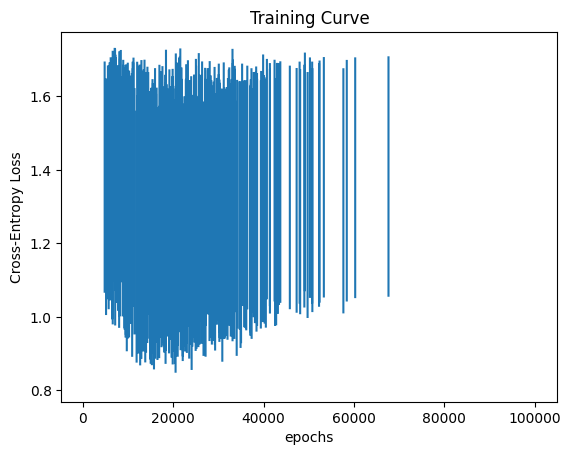

In [19]:
def main():

    # Use the same columns for training and testing data
    features = data.drop('Survived', axis=1).columns
    train_data_X = train_data[features].values # Use train_data here
    train_data_y = train_data['Survived'].values
    test_data_X = test_data[features].values # Use test_data here
    test_data_y = test_data['Survived'].values

    log_reg =LogisticRegressiontanh(thresh=0.51)
    log_reg.fit(train_data_X,train_data_y,epochs=1e5,eta=5e-3,show_curve=True)

    y_hat = log_reg.predict(train_data_X)
    y_hat_test = log_reg.predict(test_data_X)
    print(f"Training Accuracy : {accuracy(train_data_y,y_hat):.4f}")
    print(f"Test Accuracy : {accuracy(test_data_y,y_hat_test):.4f}")


    return log_reg, log_reg.fit # Assuming you have J within your fit method


if __name__=="__main__":
    log_reg, J = main()




<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: invalid value encountered in log
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: divide by zero encountered in log
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
<ipython-input-18-5b1af4e49686>:48: RuntimeWarning: invalid value encountered in multiply
  return -(1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


Training Accuracy : 0.8180
Test Accuracy : 0.8539


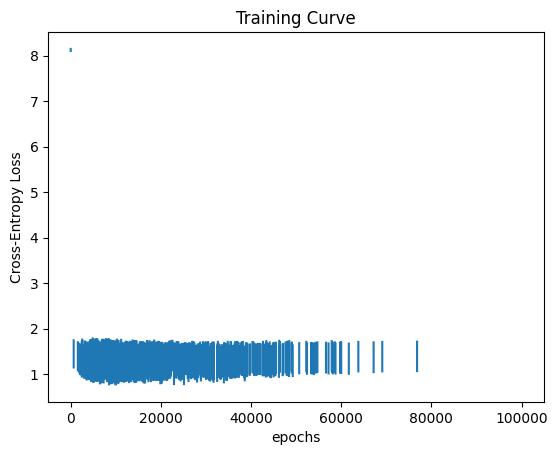

In [20]:
if __name__=="__main__":
 main()